# Week 4: Logistic Regression on Iris Dataset

## 1. Introduction
- Goal: Train and evaluate a Logistic Regression model on the classic Iris dataset.
- Dataset: Contains 150 flower samples, 4 numeric features, and 3 species (Setosa, Versicolor, Virginica).
- Key tasks:
  1. Load and inspect dataset
  2. Train/test split
  3. Train Logistic Regression model
  4. Evaluate with multiple metrics
  5. Visualize confusion matrix
  6. Write insights & reflections

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    classification_report,
    confusion_matrix,
)

## 2. Load and Inspect Data
- Load Iris dataset from sklearn.
- Convert to Pandas DataFrame.
- Check features and target classes.

In [ ]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df["species"] = df["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 3. Train/Test Split
- Split dataset into train (80%) and test (20%).
- Use sklearn's train_test_split.

In [ ]:
X = df[iris.feature_names]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (120, 4)
Test shape: (30, 4)


## 4. Train Logistic Regression Model
- Initialize and train model.
- Predict on test set.

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## 5. Model Evaluation
- Accuracy, precision, recall.
- Classification report.

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro avg):", precision_score(y_test, y_pred, average="macro"))
print("Recall (macro avg):", recall_score(y_test, y_pred, average="macro"))
print(
    "\nClassification Report:\n",
    classification_report(y_test, y_pred, target_names=iris.target_names),
)

Accuracy: 0.9666666666666667
Precision (macro avg): 0.9696969696969697
Recall (macro avg): 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## 6. Confusion Matrix Visualization
- Visualize confusion matrix with Seaborn heatmap.

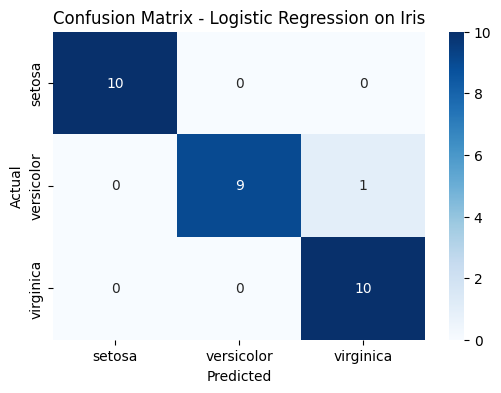

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    cmap="Blues",
    xticklabels=iris.target_names,
    yticklabels=iris.target_names,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression on Iris")
plt.show()

## 7. Insights & Reflections
- Accuracy is usually ~95–100% for Iris dataset.
- Most errors occur between **versicolor** and **virginica**, since their features overlap more.
- Logistic Regression works well here because the classes are fairly separable with linear decision boundaries.

### Logistic Regression in My Words
- It models probability of a class using the logistic (sigmoid) function.
- Decision boundary is linear (straight line or hyperplane in higher dimensions).
- Model parameters are learned using **gradient descent**, which adjusts coefficients to minimize error.

### Why This Matters
- Logistic Regression is the **baseline classification model** in ML.
- Understanding it is essential before moving to more complex algorithms.


## 8. Decision Boundary Visualization
Visualizing decision boundaries helps understanding of **how the model separates classes** in feature space.  


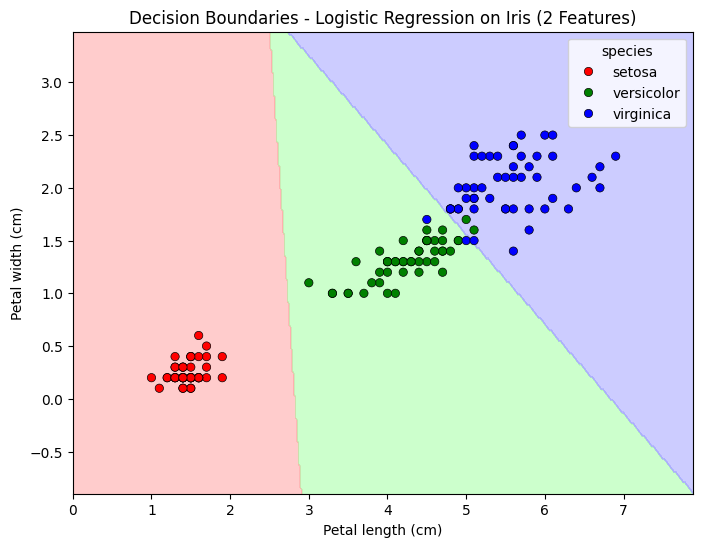

In [ ]:
from matplotlib.colors import ListedColormap

# Select two features for visualization
X_vis = df[["petal length (cm)", "petal width (cm)"]].values
y_vis = df["target"].values

# Train/test split again for these 2 features
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y_vis, test_size=0.2, random_state=42, stratify=y_vis
)

# Train logistic regression on 2D data
model_2d = LogisticRegression(max_iter=200)
model_2d.fit(X_train_vis, y_train_vis)

# Create a mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict class for each point in the grid
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ["red", "green", "blue"]

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
sns.scatterplot(
    x=X_vis[:, 0], y=X_vis[:, 1], hue=df["species"], palette=cmap_bold, edgecolor="k"
)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Decision Boundaries - Logistic Regression on Iris (2 Features)")
plt.show()